Taller 2

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

Raíces de Polinomios

5

In [9]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n = 8



In [10]:
def GetLaguerre(n,x,y):
    
    y= ((np.e**(-x))*x**n)
    
    poly = (np.e**x)*sym.diff( y,x,n )/(np.math.factorial(n))
    
    return poly

In [11]:
Laguerre = []
DLaguerre = []

for i in range(n+1):
    
    Poly = GetLaguerre(i,x,y)
    Laguerre.append(Poly)
    DLaguerre.append( sym.diff(Poly,x,1) )

In [12]:
DLaguerre

[0,
 1.0*2.71828182845905**x*(-1.0*x/2.71828182845905**x + 2.71828182845905**(-x)) + 2.71828182845905**x*(1.0*x/2.71828182845905**x - 2.0/2.71828182845905**x),
 1.0*x - 2.0,
 -0.5*x**2 + 3.0*x - 3.0,
 0.166666666666667*x**3 - 2.0*x**2 + 6.0*x - 4.0,
 -0.0416666666666667*x**4 + 0.833333333333333*x**3 - 5.0*x**2 + 10.0*x - 5.0,
 0.00833333333333333*x**5 - 0.25*x**4 + 2.5*x**3 - 10.0*x**2 + 15.0*x - 6.0,
 -0.00138888888888889*x**6 + 0.0583333333333333*x**5 - 0.875*x**4 + 5.83333333333333*x**3 - 17.5*x**2 + 21.0*x - 7.0,
 0.000198412698412698*x**7 - 0.0111111111111111*x**6 + 0.233333333333333*x**5 - 2.33333333333333*x**4 + 11.6666666666667*x**3 - 28.0*x**2 + 28.0*x - 8.0]

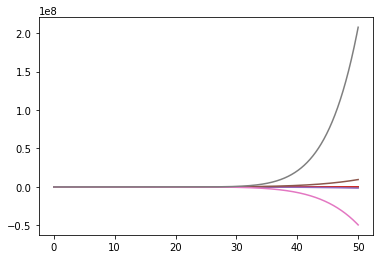

In [14]:
_x=np.linspace(0,50,10000)

for i, p in enumerate(Laguerre):
    if i!= 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))